In [6]:
# !pip3 install fbprophet

In [7]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Learning algorithms
import sklearn
from sklearn.linear_model import *
from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from Processor_cat import *

import warnings
warnings.filterwarnings('ignore')

import datetime
today = str(datetime.datetime.now().date()).replace("-","")
print("오늘 날짜 : " + today)

오늘 날짜 : 20210608


In [9]:
preprocessor = Preprocessor('../data/train.csv', '../data/test.csv')
X_trains, y_trains= preprocessor.train_preprocess()
X_tests = preprocessor.test_preprocess()

In [11]:
df = y_trains[0]

In [49]:
from fbprophet import Prophet

In [51]:
df = pd.read_csv("../data/train.csv", encoding='euc-kr')

df4 = df[df.num ==19]
df4

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
36720,19,2020-06-01 00,640.062,18.3,2.5,94.0,0.0,0.0,0.0,0.0
36721,19,2020-06-01 01,540.270,18.8,2.3,89.0,0.0,0.0,0.0,0.0
36722,19,2020-06-01 02,494.262,19.0,3.2,86.0,0.0,0.0,0.0,0.0
36723,19,2020-06-01 03,471.906,19.0,4.1,85.0,0.0,0.0,0.0,0.0
36724,19,2020-06-01 04,472.878,18.9,3.9,87.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
38755,19,2020-08-24 19,1484.892,27.9,1.7,83.0,0.0,0.6,0.0,0.0
38756,19,2020-08-24 20,1506.762,27.4,1.4,83.0,0.0,0.0,0.0,0.0
38757,19,2020-08-24 21,1471.932,27.1,1.4,86.0,0.0,0.0,0.0,0.0
38758,19,2020-08-24 22,1377.810,26.9,0.0,84.0,0.0,0.0,0.0,0.0


11

In [56]:
df = df4[['date_time', '전력사용량(kWh)']]

df.columns = ['ds', 'y']

In [62]:
df['cap'] = max(df.y)

df['floor'] = min(df.y)

In [64]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [92]:
future = m.make_future_dataframe(periods=168, freq='H')
future.tail()

,ds
2203,2020-08-31 19:00:00
2204,2020-08-31 20:00:00
2205,2020-08-31 21:00:00
2206,2020-08-31 22:00:00
2207,2020-08-31 23:00:00


In [93]:
future['cap'] = max(df.y)
future['floor'] = min(df.y)

In [94]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2203,2020-08-31 19:00:00,1228.427649,1845.18,461.7,1378.895826,1592.939455,1222.633749,1233.939506,256.233243,256.233243,...,246.152194,246.152194,246.152194,10.081049,10.081049,10.081049,0.0,0.0,0.0,1484.660892
2204,2020-08-31 20:00:00,1228.846447,1845.18,461.7,1414.928769,1635.751890,1222.998727,1234.426978,300.978060,300.978060,...,291.947449,291.947449,291.947449,9.030611,9.030611,9.030611,0.0,0.0,0.0,1529.824507
2205,2020-08-31 21:00:00,1229.265189,1845.18,461.7,1399.664688,1618.154136,1223.373837,1234.928532,277.843999,277.843999,...,269.885985,269.885985,269.885985,7.958014,7.958014,7.958014,0.0,0.0,0.0,1507.109189
2206,2020-08-31 22:00:00,1229.683875,1845.18,461.7,1314.404738,1525.496189,1223.758237,1235.360673,190.673149,190.673149,...,183.800946,183.800946,183.800946,6.872204,6.872204,6.872204,0.0,0.0,0.0,1420.357024
2207,2020-08-31 23:00:00,1230.102505,1845.18,461.7,1195.070627,1400.976010,1224.142158,1235.837404,69.801395,69.801395,...,64.019145,64.019145,64.019145,5.782250,5.782250,5.782250,0.0,0.0,0.0,1299.903900


In [95]:
forecast.tail()


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2203,2020-08-31 19:00:00,1228.427649,1845.18,461.7,1378.895826,1592.939455,1222.633749,1233.939506,256.233243,256.233243,...,246.152194,246.152194,246.152194,10.081049,10.081049,10.081049,0.0,0.0,0.0,1484.660892
2204,2020-08-31 20:00:00,1228.846447,1845.18,461.7,1414.928769,1635.751890,1222.998727,1234.426978,300.978060,300.978060,...,291.947449,291.947449,291.947449,9.030611,9.030611,9.030611,0.0,0.0,0.0,1529.824507
2205,2020-08-31 21:00:00,1229.265189,1845.18,461.7,1399.664688,1618.154136,1223.373837,1234.928532,277.843999,277.843999,...,269.885985,269.885985,269.885985,7.958014,7.958014,7.958014,0.0,0.0,0.0,1507.109189
2206,2020-08-31 22:00:00,1229.683875,1845.18,461.7,1314.404738,1525.496189,1223.758237,1235.360673,190.673149,190.673149,...,183.800946,183.800946,183.800946,6.872204,6.872204,6.872204,0.0,0.0,0.0,1420.357024
2207,2020-08-31 23:00:00,1230.102505,1845.18,461.7,1195.070627,1400.976010,1224.142158,1235.837404,69.801395,69.801395,...,64.019145,64.019145,64.019145,5.782250,5.782250,5.782250,0.0,0.0,0.0,1299.903900


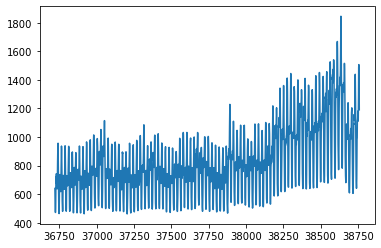

In [96]:
plt.plot(df.y)

In [97]:
best_model = pd.read_csv('../best_model.csv')

def get_num(data):
    return data[:2]

best_model['num'] = best_model['num_date_time'].apply(get_num)

In [98]:
bdf = best_model[best_model.num == '19']

In [99]:
len(bdf)

168

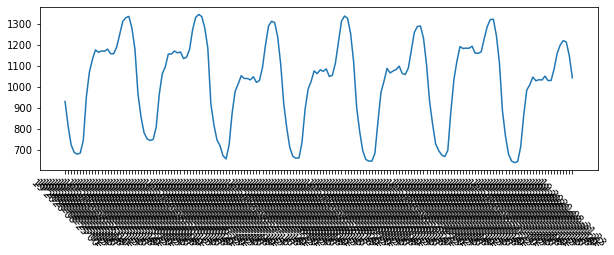

In [100]:
fig = plt.figure(figsize = (10,3))

plt.xticks(rotation = -45)
plt.plot(bdf.num_date_time,bdf.answer)

In [108]:
pred = np.array(forecast.iloc[-168:]['trend'])
answer = np.array(bdf.answer)

In [109]:
def SMAPE( true, pred):
    return np.mean((np.abs(true - pred)) / (np.abs(true) + np.abs(pred))) * 100

In [110]:
SMAPE(pred,answer)

10.110216559016735

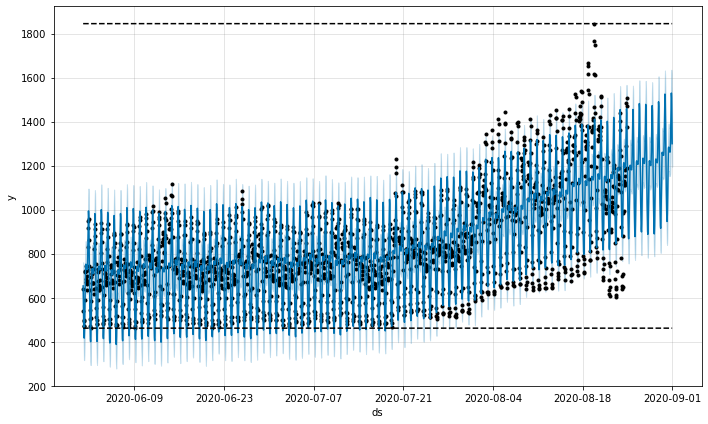

In [101]:
fig1 = m.plot(forecast)

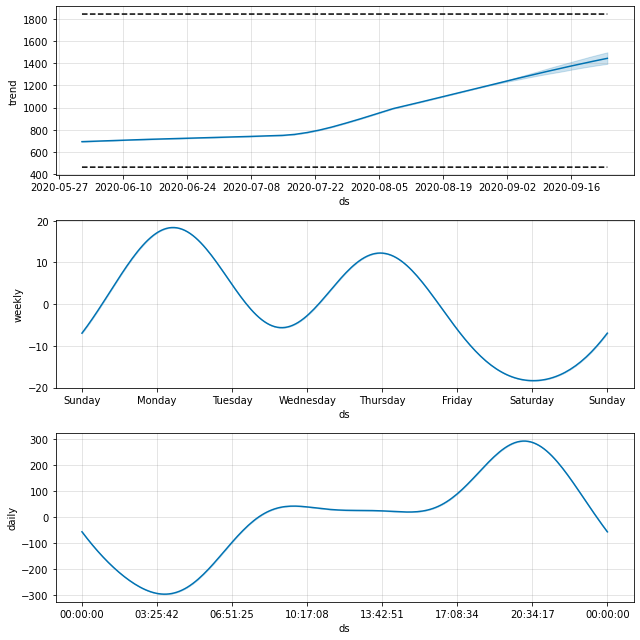

In [72]:
fig2 = m.plot_components(forecast)